<a href="https://colab.research.google.com/github/Ramanand-Yadav/TitanicSurvivalMachineLearning/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Survival Preiction**

**In the following scipt we will use the following models!**
* SVC
* Random Forest Classifier
* Logistic Regression
* XGBOOST

**At last we will ensembled them using the voting classifier with higher weights for the higher acc models**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# just for good color
palette=sns.color_palette('magma')
sns.set(palette=palette)

In [ ]:
train_data=pd.read_csv('https://raw.githubusercontent.com/Ramanand-Yadav/TitanicSurvivalMachineLearning/main/Dataset.csv', index_col='PassengerId')

train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




Variable  	Definition  	Key


---


survival:	Survival:	0 = No, 1 = Yes
pclass:	Ticket class:	1 = 1st, 2 = 2nd, 3 = 3rd
sex	: Sex	
Age	: Age in years	
sibsp :	# of siblings / spouses aboard the Titanic	
parch :	# of parents / children aboard the Titanic	
ticket :	Ticket number	
fare :	Passenger fare	
cabin	: Cabin number	
embarked :	Port of Embarkation	C = Cherbourg, Q = Queenstown : S = Southampton



In [ ]:
#Dropping the Name and Ticket columns 
train_data_clean=train_data.drop(['Name','Ticket'], axis=1)

In [ ]:
train_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [ ]:
#I noticed that there are over 600 null values in the Cabin column which is over 70%
#Extracting the cabin letter into a new column
train_data_clean['CabinLetter'] = train_data_clean['Cabin'].str.extract('(\w)')
train_data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinLetter
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S,NaN
2,1,1,female,38.0,1,0,71.2833,C85,C,C
3,1,3,female,26.0,0,0,7.9250,NaN,S,NaN
4,1,1,female,35.0,1,0,53.1000,C123,S,C
5,0,3,male,35.0,0,0,8.0500,NaN,S,NaN


# **Visualizations**

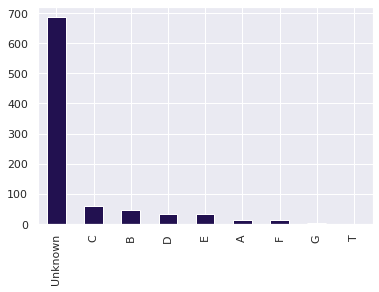

In [ ]:
#Filling the null cabin letters with 'unknown' as a value
train_data_clean['CabinLetter'].fillna('Unknown', inplace=True)
train_data_clean['CabinLetter'].value_counts().plot(kind='bar')

train_data_clean['CabinLetter'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
#Dropping the Cabin column
train_data_clean.drop(['Cabin'], axis=1, inplace=True)

In [ ]:
#Embarked has only 2 missing values so im gonna drop them
train_data_clean = train_data_clean[train_data_clean['Embarked'].notna()]
train_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     889 non-null    int64  
 1   Pclass       889 non-null    int64  
 2   Sex          889 non-null    object 
 3   Age          712 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    object 
 8   CabinLetter  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [ ]:
#Creating a new feature 'relatives' which consists of SibSp+Parch
train_data_clean['relatives']=train_data_clean['SibSp']+train_data_clean['Parch']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train_data_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'CabinLetter', 'relatives'],
      dtype='object')

# Split

In [ ]:
X= train_data_clean.drop('Survived', axis=1)
y= train_data_clean['Survived']

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLetter,relatives
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,Unknown,1
2,1,female,38.0,1,0,71.2833,C,C,1
3,3,female,26.0,0,0,7.9250,S,Unknown,0
4,1,female,35.0,1,0,53.1000,S,C,1
5,3,male,35.0,0,0,8.0500,S,Unknown,0


# **Preprocessing**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

#Select categorical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
categorical_cols

['Sex', 'Embarked', 'CabinLetter']

In [ ]:
#Select numerical columns
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'relatives']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


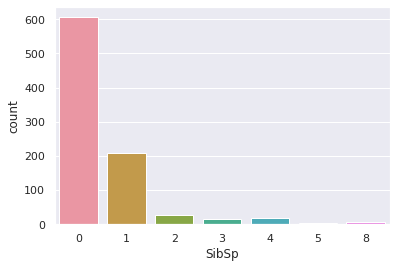

In [ ]:
sns.countplot(X['SibSp'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


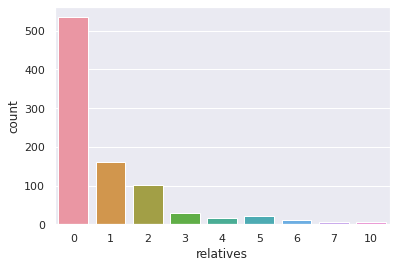

In [ ]:
sns.countplot(X['relatives'])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       889 non-null    int64  
 1   Sex          889 non-null    object 
 2   Age          712 non-null    float64
 3   SibSp        889 non-null    int64  
 4   Parch        889 non-null    int64  
 5   Fare         889 non-null    float64
 6   Embarked     889 non-null    object 
 7   CabinLetter  889 non-null    object 
 8   relatives    889 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 101.7+ KB


In [ ]:
X.isnull().sum()

Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
CabinLetter      0
relatives        0
dtype: int64

# **Preprocessing Pipeline**

In [ ]:
#Preprocessing for numerical data(Age in the train)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
X['CabinLetter'].value_counts()

Unknown    687
C           59
B           45
D           33
E           32
A           15
F           13
G            4
T            1
Name: CabinLetter, dtype: int64

In [ ]:
#Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  #handle unknown wont give an error if it gets a new value in the test set for the categorical values
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
                                  'relatives']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Embarked', 'CabinLetter'])])

# Random Forest Pipeline

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth= 6, min_samples_leaf= 1, min_samples_split= 2, random_state=0)
rfc_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', rfc)
                              ])
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc_pipeline, X, y, cv=5)
print('Random Forest Scores:',scores)
print('Random Forest:',scores.mean())


Random Forest Scores: [0.81460674 0.80898876 0.8258427  0.79775281 0.83050847]
Random Forest: 0.8155398971624453


# Logistic Regression Pipeline

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg_classifier=LogisticRegression(C= 0.1, penalty= 'l2', solver='liblinear',random_state=0)
log_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', log_reg_classifier)
                                  ])
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg_pipeline, X, y, cv=5)
print('Logistic Regression Scores:',scores)
print('Logistic Regression:',scores.mean())

Logistic Regression Scores: [0.78651685 0.78651685 0.79213483 0.76966292 0.83050847]
Logistic Regression: 0.7930679870500857


# XGBoost Pipeline

In [ ]:
#XGBoost
from xgboost import XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate= 0.1, max_depth= 5, min_child_weight= 1,
                    n_estimators= 100, subsample= 1.0, use_label_encoder=False,
                    verbosity=0, random_state=0)
xgb_pipeline= Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', xgb)
                             ])
scores = cross_val_score(xgb_pipeline, X, y, cv=5)
print('XGB Classifier Scores:',scores)
print('XGB Classifier:',scores.mean())

XGB Classifier Scores: [0.79775281 0.81460674 0.87078652 0.82022472 0.86440678]
XGB Classifier: 0.8335555132355742


# SVC Pipeline

In [ ]:
#SVC
from sklearn.svm import SVC
svc = SVC(C= 3, kernel= 'rbf', random_state=0)
svc_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', svc)
                              ])
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc_pipeline, X, y, cv=5)
print('SVC Scores:',scores)
print('SVC:',scores.mean())

SVC Scores: [0.8258427  0.79775281 0.82022472 0.80337079 0.8700565 ]
SVC: 0.8234495016822192


# **Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
       ('rfc', rfc), ('log', log_reg_classifier), ('svc', svc), ('xgb',xgb)],
        voting='hard')
voting_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', voting)
                                 ])
from sklearn.model_selection import cross_val_score
scores = cross_val_score(voting_pipeline, X, y, cv=5)
print('Voting Classifier Scores:',scores)
print('Voting:',scores.mean())


Voting Classifier Scores: [0.83707865 0.79775281 0.83707865 0.79775281 0.84745763]
Voting: 0.8234241096933917


In [ ]:
from sklearn.ensemble import VotingClassifier
svc1 = SVC(C= 3, kernel= 'rbf', random_state=0, probability=True)
voting = VotingClassifier(estimators=[
       ('rfc', rfc), ('log', log_reg_classifier), ('svc', svc1), ('xgb',xgb)],
        voting='soft')
voting_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', voting)
                                 ])
from sklearn.model_selection import cross_val_score
scores = cross_val_score(voting_pipeline, X, y, cv=5)
print('Voting Classifier Scores:',scores)
print('Voting:',scores.mean())


Voting Classifier Scores: [0.8258427  0.81460674 0.82022472 0.80898876 0.8700565 ]
Voting: 0.8279438837046911


# Example on the training data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid =train_test_split(X, y, test_size=0.2, random_state=42)

voting_pipeline.fit_transform(X_train, y_train)
y_pred= voting_pipeline.predict(X_valid)


Voting Classifier accuracy score: 82.02%
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       109
           1       0.78      0.74      0.76        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178



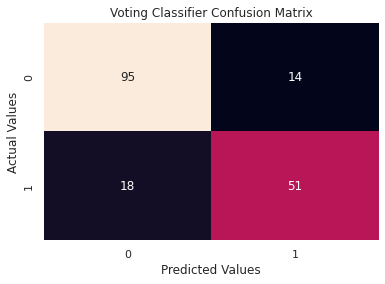

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm=confusion_matrix(y_valid, y_pred)
print('Voting Classifier accuracy score:', '{:.2%}'.format(accuracy_score(y_valid, y_pred)))
print(classification_report(y_valid, y_pred))
sns.heatmap(cm, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Voting Classifier Confusion Matrix')
plt.show()

Note: Accuracy can vary depending on the random split

In [ ]:
#Training the final model
voting_pipeline.fit(X,y)

#Test data
test_data=pd.read_csv('/content/test.csv', index_col='PassengerId')
test_data_clean=test_data.drop(['Name','Ticket'], axis=1)
test_data_clean['Cabin Letter'] = test_data_clean['Cabin'].str.extract('(\w)')
test_data_clean['Cabin Letter'].fillna('Unknown', inplace=True)
test_data_clean.drop(['Cabin'], axis=1, inplace=True)
test_data_clean['relatives']=test_data_clean['SibSp']+test_data_clean['Parch']

predicted=voting_pipeline.predict(test_data_clean)
ids=test_data.index
pred_df= pd.DataFrame({'PassengerId': ids,
                       'Survived': predicted})
pred_df.to_csv('submission.csv', index=False)

In [ ]:
voting_pipeline.fit(X_train, y_train)
y_predict = voting_pipeline.predict(X_valid)
print(accuracy_score(y_valid, y_predict))

0.8202247191011236


#**Pickle**

In [ ]:
import pickle

In [ ]:
# save the model 
file = "titanicModel.pkl"
with open(file, 'wb') as f:
  pickle.dump(voting_pipeline, f)

In [ ]:
# open the model 
file = '/content/titanicModel.pkl'
with open(file, 'rb') as f:
  model = pickle.load(f)

In [ ]:
y_mpredict = model.predict(X_valid)

In [ ]:
accuracy_score(y_valid, y_mpredict)

0.8202247191011236

#**Streamlit**

In [ ]:
!pip install streamlit

In [ ]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'CabinLetter', 'relatives'],
      dtype='object')

In [ ]:
X['relatives'].value_counts()

0     535
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: relatives, dtype: int64

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle 
from PIL import Image

model = pickle.load(open('titanicModel.pkl', 'rb'))

def run():

    img1 = Image.open('/content/img1.jpg')
    st.image(img1)

    st.title(
      """
      Titanic - Machine Learning from Disaster
      **Predicting survival on the Titanic and getting familiar with ML.**
      """
    )

    # Enter Name
    name = st.text_input('Enter Name')
   
    # Pclass
    Pclass = st.number_input("Ticket Class", min_value=1, max_value=3, value=1)
   
    #Gender
    sex = st.selectbox("Select Gender", ('Male', 'Female'))

    #Age
    age = st.number_input("Enter Your Age", min_value=1, max_value=80, value = 1)
    #st.write(age)

    #SibSp
    SibSp = st.selectbox("Number of child", (0, 1, 2, 3, 4, 5, 8))
    st.write(SibSp)

    #Parch
    Parch = st.selectbox("Number of guardian",(0, 1, 2, 3, 4, 5, 6))
    # st.write(Parch)

    #Fare
    Fare = st.number_input("Ticket Price", min_value=0.0, max_value=512.3292)
    # st.write(Fare)

    #Embarked
    Embarked = st.selectbox("Port of Embarkation", ('S', 'C', 'Q'))
    # st.write(Embarked)

    #CabinLetter
    CabinLetter = st.selectbox("Choose Cabin Latter", ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Unknown'))
    # st.write(CabinLetter)

    #relatives
    relatives = st.selectbox("No. of relatives", (0, 1, 2, 3, 4, 5, 6, 7, 10))
    # st.write(relatives) 

    df = pd.DataFrame({'Pclass':Pclass, 'Sex':sex, 'Age':age, 'SibSp':SibSp, 'Parch':Parch, 'Fare':Fare,
                        'Embarked':Embarked, 'CabinLetter':CabinLetter, 'relatives':relatives}, index=[0])

    
    # st.write(df)

    if st.button('Check'):
        prediction = model.predict(df)
        lc = [str(i) for i in prediction]
        ans = int("".join(lc))
        
        if ans == 0:
            st.error(
                "Sorry! Rest in Peace"
            )
        else:
            st.success(
                "congrats you are safe!"
            )




  


run()

Overwriting app.py


In [ ]:
!streamlit run app.py &>/dev/null &

In [ ]:
!nohup npx localtunnel --port 8502 &

nohup: appending output to 'nohup.out'
